In [82]:
# import everything we need
import sys

sys.path.insert(1, '..') # make sure to use the code in current repo

import numpy as np
import matplotlib.pyplot as plt

from lofarSun import IM 

from sunpy.net.helioviewer import HelioviewerClient
import sunpy.map
from sunpy.map import Map
from sunpy.coordinates import frames, sun, get_earth
from astropy.coordinates import SkyCoord

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
lofar_cleaned = IM.IMdata()
lofar_cleaned.load_fits('../SB058-t0032-image.fits')
#lofar_cleaned.load_fits('../SB008-t0074-image.fits')

smap = lofar_cleaned.make_map()

In [135]:
sunpy.__version__

'4.0.0'

In [136]:

import sunpy.data.sample  
hv = HelioviewerClient()  
file = hv.download_jp2(lofar_cleaned.t_obs, observatory="SDO", instrument="AIA",
                       measurement="193",directory='./')
swapmap = Map(file)  # load the downloaded file

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

<Distance 1.00264891 AU>

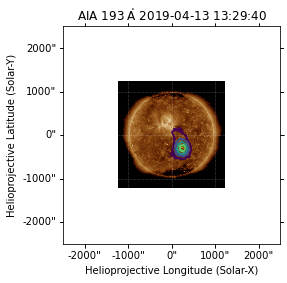

In [137]:

swapmap.plot()
with sunpy.coordinates.frames.Helioprojective.assume_spherical_screen(smap.observer_coordinate):
                smap.draw_contours(levels=np.linspace(np.max(lofar_cleaned.data_xy_calib)*0.3, 
                np.max(lofar_cleaned.data_xy_calib), 5))
smap.observer_coordinate
sun.earth_distance(time=lofar_cleaned.header['DATE-OBS'])

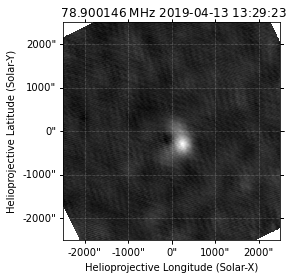

In [138]:
smap.plot()

0.0366201911451259


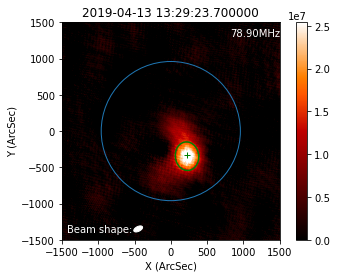

In [140]:
# process interferometry data
#lofar_cleaned.load_fits('../SB043-t0526-image.fits')
lofar_cleaned.load_fits('../SB058-t0032-image.fits')
lofar_cleaned.plot_image(fov=1500)
mx,my=lofar_cleaned.peak_xy_coord_arcsec()
popt, pcov=lofar_cleaned.fit_gaussian2d()
plt.plot(mx,my,'g+')

x_el,y_el=IM.get_tile_ellipse_from_fit(popt)

plt.plot(x_el+popt[1],y_el+popt[2],'g-')

In [141]:
print('max pix:',lofar_cleaned.peak_xy_coord_pix())
print('max pix-loc(asec):',lofar_cleaned.peak_xy_coord_arcsec())
print('max gaussian fit [Peak T, x,y,tile,x-sigma,y-sigma]:',popt)

max pix: [1099  912]
max pix-loc(asec): [224.9999999999945, -336.00000000000136]
max gaussian fit [Peak T, x,y,tile,x-sigma,y-sigma]: [ 2.89138395e+07  2.23750785e+02 -3.46147185e+02 -1.14560275e-01
  1.37114109e+02  1.67471756e+02]


In [73]:
popt, pcov=lofar_cleaned.fit_gaussian2d()

In [43]:
lofar_cleaned.data_xy = lofar_cleaned.sun_coord_trasform(lofar_cleaned.data,lofar_cleaned.header,True,True)

In [44]:
# show information
lofar_cleaned.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                 2048 / length of data axis 1                          
NAXIS2  =                 2048 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
NAXIS4  =                    1 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BSCALE  =                   1.                                                  
BZERO   =                   0.                                                  
BUNIT   = 'JY/BEAM '        

In [47]:
smap.fits_header

WCSAXES =                    2                                                  
CRPIX1  =    857.7288532764078                                                  
CRPIX2  =    835.1690487111396                                                  
CDELT1  =    2.999999999999999                                                  
CDELT2  =    2.999999999999999                                                  
CUNIT1  = 'arcsec  '                                                            
CUNIT2  = 'arcsec  '                                                            
CTYPE1  = 'HPLN-TAN'                                                            
CTYPE2  = 'HPLT-TAN'                                                            
CRVAL1  =    71.44841799333908                                                  
CRVAL2  =    1.419474826926167                                                  
LONPOLE =                180.0                                                  
LATPOLE =                  0